## Pandas Beyond DataFrames: Exploring its visualization Capabilities- Part 1

Pandas has long been recognized as the go-to tool for data manipulation and analysis in Python, primarily known for its powerful DataFrame structure. However, beyond its prowess in handling **tabular data**, Pandas harbors a lesser-known collection of visualization capabilities. Pandas offers a seamless interface for generating a diverse array of visualizations directly from DataFrames and Series.

Let's embark on a journey to uncover the **hidden gems of Pandas visualization.**  

For the readers' convenience, I've divided this journey into two parts:

- Part 1: Beginner-Friendly
- Part 2: Intermediate

### Displaying the list of visualization available in pandas suite

In [1]:
import pandas as pd

# List of available plot types from pandas.plotting module
plot_types = pd.plotting.__all__
# List of available plot types from DataFrame.plot
df_plots = list(pd.DataFrame().plot._all_kinds)

# Combine both lists and remove duplicates
all_plot_types = list(set(plot_types + df_plots))

# Print the list of plot types in two columns with increased space
midpoint = len(all_plot_types) // 2
column_width = 40
print("Available plot types in Pandas:",len(all_plot_types))
print("-" * 75)
for i in range(midpoint):
    print(f"{all_plot_types[i]:<{column_width}}", end="")
    if i + midpoint < len(all_plot_types):
        print(all_plot_types[i + midpoint])

Available plot types in Pandas: 28
---------------------------------------------------------------------------
boxplot_frame                           bar
line                                    radviz
hist                                    bootstrap_plot
plot_params                             hexbin
boxplot                                 hist_frame
hist_series                             andrews_curves
density                                 PlotAccessor
area                                    deregister_matplotlib_converters
register_matplotlib_converters          boxplot_frame_groupby
barh                                    table
lag_plot                                scatter
autocorrelation_plot                    scatter_matrix
kde                                     box
pie                                     parallel_coordinates


In this notebook we will see 
- Pie
- Hexbin
- KDE
- RadViz
- Scatter matrix

Let's load the dataset. I'm going to use the Iris dataset, which I'll pull from the web. This demonstrates that ***I'm not using any other visualization library besides Pandas***.

In [2]:
url='https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv'
df_iris=pd.read_csv(url)
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Pie Chart: 
Initially, I didn't plan to include a simple pie chart in this notebook. However, since a pie chart isn't a part of the seaborn suite (widely used Python visualization library), I wanted to include it, as pandas offers this functionality.

Text(0, 0.5, '')

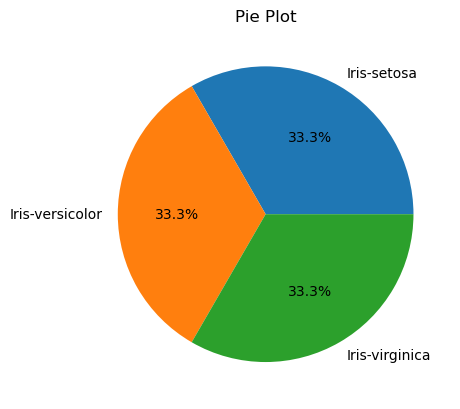

In [9]:
df_iris['Name'].value_counts().plot.pie(autopct='%.1f%%',title="Pie Plot");

autopct='%.1f%%' - This is to display the count as a percentage of the entire dataset.

**Inference:** It is self explanatory, each category in the dataset comprises 33.33% of the total number of flowers in the dataset.

### Hexbin Chart:

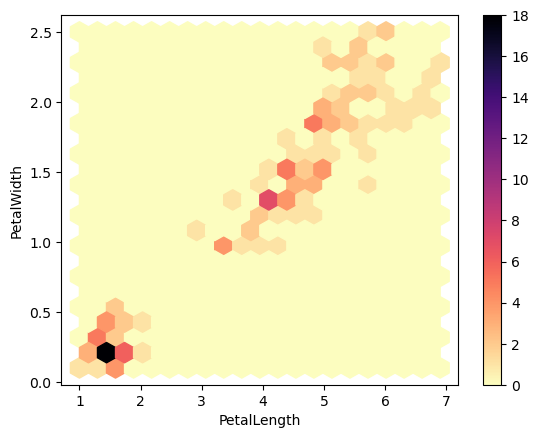

In [10]:
df_iris.plot.hexbin(x="PetalLength", y="PetalWidth", gridsize=20, cmap='magma_r');

The hexbin plot helps us identify any patterns or trends in the data.

**Inferences:** 
- As we see a diagonal pattern of hexagons, there is a linear relationship between petal length and petal width
- The color intensity of each hexagon represents the density of data points within that bin. Darker colors indicate higher densities, while lighter colors indicate lower densities. This allows us to assess the distribution of data across different regions of the plot.

### Kernel Density Estimation - KDE Plot

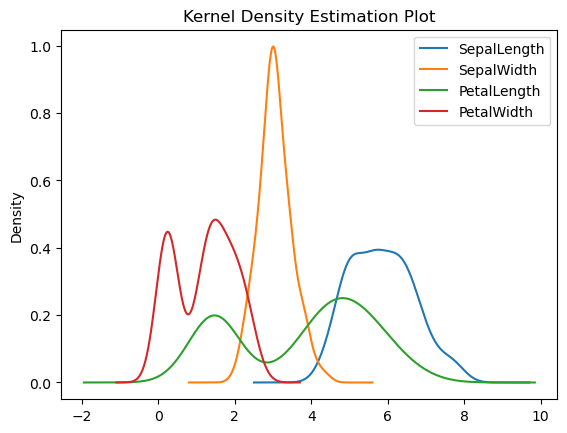

In [11]:
df_iris.plot.kde(title='Kernel Density Estimation Plot');

**Notes:**
- Each curve represents the distribution of values for a particular variable. The **peaks** of the curves indicate **most concentrated** regions, while the lower points represent regions of lower concentration.
- KDE plots allow you to compare the distributions of different variables and identify any patterns or trends in the data.

### RadViz Plot:
RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane, In our case they are equally spaced on a unit circle. Each *corner grey* point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a **spring**, the stiffness of which is proportional to the numerical value of that attribute. 

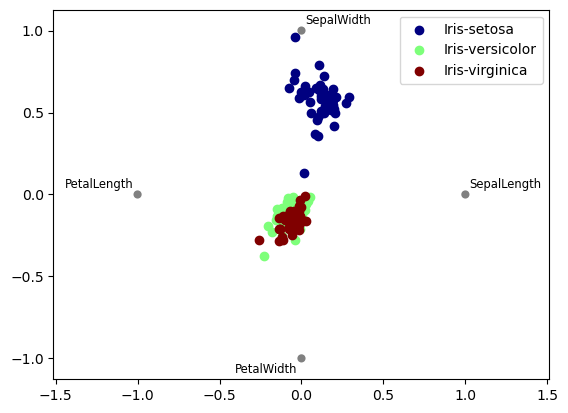

In [14]:
from pandas.plotting import radviz
radviz(df_iris,"Name",colormap='jet');

The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

**Notes:**
- Features that have a larger influence on species differentiation will have a stronger pull on the points towards their respective axes. 
- We can also observe the degree to which each feature contributes to the separation of species clusters.
- Outliers, if present, may appear as points that are far away from the clusters of their respective species.
- The RadViz plot facilitates the identification of clusters or groups of similar observations based on their positions relative to the feature axes. 

**Inference :**
- ***Sepal Width*** feature has a significant say in the classifcation of **Setosa** species.
- Clusters of points closer together in the plot likely represent observations with similar feature values (virginca ans versicolor have similar feature values.


### Scatter Matrix
These are plots similar to Pair plot in seaborn library

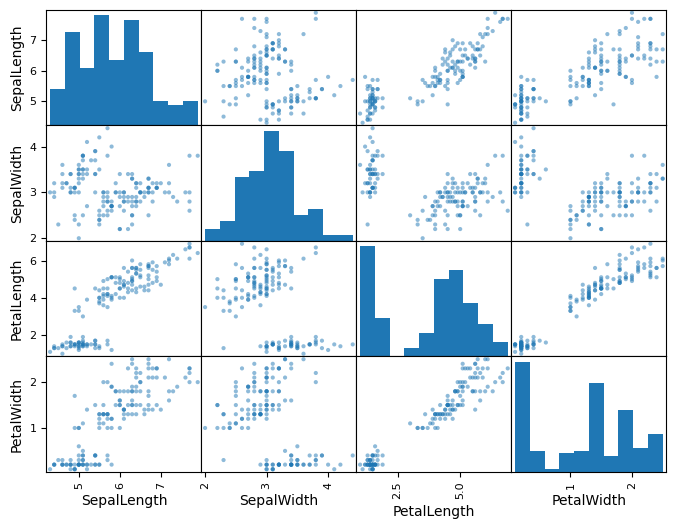

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_iris, figsize=(8, 6), diagonal="hist" ); #diagonal can be kde or hist

**Notes:**
- Each cell in the scatter matrix represents a scatter plot between two variables. Usong it, we can assess the relationship between variable pairs.
- The diagonal of the scatter matrix typically contains histograms or density plots of each variable. These plots show the distribution of each variable individually. In the above plot i have used Histogram.
- Outliers in the data may appear as individual points that deviate significantly from the main cluster of points.

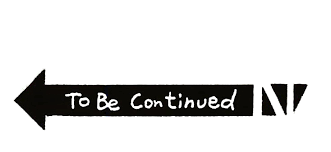